<h1><center>Oligopoly</center></h1>
<p><center>"a state of limited competition, in which a market is shared by a small number of producers or sellers."<hr></center></p>


# Table of Content
1. Exploring the Various Sectors Where Oligopolies Thrive
2. Illuminating Examples of How Oligopolies Affect Markets
3. Weighing the Advantages and Disadvantages of Oligopoly: A Summary of Key Considerations

Within each of these sectors we can see **oligopoly** have an effect on how that sector is ran and controlled. Throughout this notebook I will display different statical facts through visual graphs to amplify the effects this kind of market structure has on each sector. Towards the end of this notebook I will present some information on how this kind of market strucutre reflects human nature at its core. I hope you enjoy!



# USEFUL CODE:

In [1]:
nfl_teams = [
    "Arizona Cardinals",
    "Atlanta Falcons",
    "Baltimore Ravens",
    "Buffalo Bills",
    "Carolina Panthers",
    "Chicago Bears",
    "Cincinnati Bengals",
    "Cleveland Browns",
    "Dallas Cowboys",
    "Denver Broncos",
    "Detroit Lions",
    "Green Bay Packers",
    "Houston Texans",
    "Indianapolis Colts",
    "Jacksonville Jaguars",
    "Kansas City Chiefs",
    "Las Vegas Raiders",
    "Los Angeles Chargers",
    "Los Angeles Rams",
    "Miami Dolphins",
    "Minnesota Vikings",
    "New England Patriots",
    "New Orleans Saints",
    "New York Giants",
    "New York Jets",
    "Philadelphia Eagles",
    "Pittsburgh Steelers",
    "San Francisco 49ers",
    "Seattle Seahawks",
    "Tampa Bay Buccaneers",
    "Tennessee Titans",
    "Washington Redskins"
]

In [2]:
# All the datasets that will be used throughout this notebook
import pandas as pd
import math
df = pd.read_csv("datasets/Fortune1000CompaniesRevenue.csv") 
df2 = pd.read_csv("datasets/superbowl.csv") 
df3 = pd.read_csv("datasets/phones_data.csv")
df4 = pd.read_csv("datasets/TopRichestInWorld.csv")

In [3]:
# This method gets the names and networth from each company
def richPeople(companies):
    names = []
    netWorth = []
    for company in companies:
        names.append(df4.loc[df4['Source'] == company, 'Name'].values[0])
        dirtyMoney = df4.loc[df4['Source'] == company, 'NetWorth'].values[0]
        # Make money clean
        cleanMoney = int(dirtyMoney.replace('$', '').replace(',', '')) / 1000000000
        netWorth.append(cleanMoney)
        
        
    return (np.array(names),np.array(netWorth))

# This method calculates the total revenue from each of the companies
def totalRev(companyList):
    companies = df[df["name "].isin(companyList)]
    totalRevenue = []
    #Cleaning data
    for i in range(len(companyList)):
        rev = companies.iloc[i].iloc[2]
        # Dataset contains the total rev as a string with both $ and . symbols
        if('.' in rev):
            rev = rev[:rev.find('.')]
            totalRevenue.append(int(rev.strip("$ ").replace(",","")))
        else:
            totalRevenue.append(int(rev.strip("$ ").replace(",","")))
   
    return(np.array(totalRevenue))

# This method retrieves the total wins, loses and appearences from all the super bowls for each team
def nflScape(teams):
    won = []
    lost = []
    appeared = []
    for team in teams:
        wins = df2["Winner"].str.count(team).sum()
        loses = df2["Loser"].str.count(team).sum()
        won.append(wins)
        lost.append(loses)
        appeared.append(wins+loses)
    won = np.array(won)
    lost = np.array(lost)
    appeared = np.array(appeared)
    return won, lost, appeared
# This method is used to get the phone prices from Apple and Samsung
def phonePrices(companies):
    apple = df3[df3['brand_name'] == 'Apple']
    tempApplePrices = apple['highest_price'].tolist()
    applePrices = []
    for price in tempApplePrices:
        if(not math.isnan(price)):
            applePrices.append(price * .027)

    samsung = df3[df3['brand_name'] == 'Samsung']
    tempSamsungPrices = samsung['highest_price'].tolist()
    samsungPrices = []
    for price in tempSamsungPrices:
         if(not math.isnan(price)):
            samsungPrices.append(price * .027)
    return np.array(applePrices), np.array(samsungPrices)


# 1. Sectors
   - Beverages 
   - Technology
   - Pharmaceutical
   - Sports


<h1><center>Beverages</center></h1>

Annual Total Revenue From U.S Top Beverage Companies
- PepsiCo
- Coca-Cola
- Starbucks
- Keurig Dr Pepper



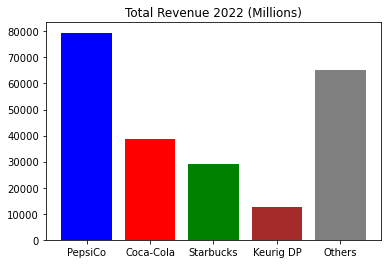

In [4]:
import numpy as np 
from matplotlib import pyplot as plt 

companies = np.array(["PepsiCo","Coca-Cola","Starbucks","Keurig Dr Pepper"])


names = np.array(["PepsiCo", "Coca-Cola", "Starbucks", "Keurig DP", "Others"])
tr = totalRev(companies)
others = 225000 - sum(tr)
tr = np.append(tr,others)
plt.title("Total Revenue 2022 (Millions)")  
plt.bar(names, tr, color=['Blue','Red','Green',"brown","grey"])
plt.gcf().set_facecolor('white') 
plt.show()

# 4 Companies Dominate 71% of U.S. Beverage Revenue

According to [Zippa](https://www.zippia.com/advice/us-beverage-industry-statistics/#:~:text=As%20of%202022%2C%20the%20U.S.,of%20more%20than%20%24225%20billion), the U.S. beverage industry has generated an annual revenue of about \\$225 billion. These 4 companies' total combined revenue for 2022 adds up to about \\$160 billion. 

<h1><center>Technology</center></h1>

 Annual Total Revenue From U.S Top Technology Companies
- Amazon
- Apple
- Alphabet (Google)
- Meta (Facebook)
- Microsoft

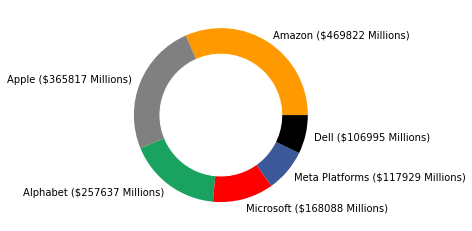

In [5]:
companies = np.array(["Amazon", "Apple", "Alphabet", "Microsoft", "Meta Platforms","Dell Technologies"])


names = np.array(["Amazon", "Apple", "Alphabet", "Microsoft", "Meta Platforms", "Dell"])
tr = totalRev(companies)
names = ["Amazon (${} Millions)".format(tr[0]), "Apple (${} Millions)".format(tr[1]), "Alphabet (${} Millions)".format(tr[2]), 
         "Microsoft (${} Millions)".format(tr[3]), "Meta Platforms (${} Millions)".format(tr[4]), "Dell (${} Millions)".format(tr[5])]
size = tr
 
# Create a circle at the center of the plot
my_circle = plt.Circle( (0,0), 0.7, color='white')

# Give color names
plt.pie(size, labels=names, colors=['#FF9900','grey','#1aa260','red','#3b5998', 'black'])
p = plt.gcf()
plt.gcf().set_facecolor('white') 
p.gca().add_artist(my_circle)

# Show the graph
plt.show()

# Top 6 U.S. Technology Companies

As we can see from this donut chart the big leaders are Amazon, Apple, and Alphabet. These companies are not only the top tier tech companies, but are probably the most advance and largest companies we've seen in human history.

<h1><center>Pharmaceutical</center></h1>

<div style="align-items:center;">
    Annual Total Revenue From U.S Top Pharmaceutical Companies
    <ul>
        <li>Johnson &amp; Johnson</li>
        <li>Pfizer</li>
        <li>AbbVie</li>
        <li>Merck</li>
    </ul>
</div>


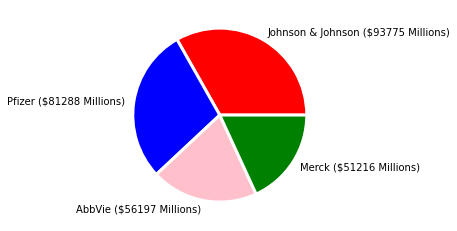

In [6]:
companies = np.array(["Johnson & Johnson", "Pfizer", "AbbVie", "Merck"])
names = np.array(["Johnson & Johnson", "Pfizer", "AbbVie", "Merck"])
tr = totalRev(companies)
names = ["Johnson & Johnson (${} Millions)".format(tr[0]), "Pfizer (${} Millions)".format(tr[1]), 
         "AbbVie (${} Millions)".format(tr[2]), "Merck (${} Millions)".format(tr[3])]
size = tr

my_circle = plt.Circle( (0,0), 0.7, color='white')
plt.pie(size, labels=names, colors=['red','blue','pink','green'],wedgeprops = { 'linewidth' : 3, 'edgecolor' : 'white' })
plt.gcf().set_facecolor('white') 
plt.show()

# Top Pharmaceutical Companies
* It was difficult to provide U.S. total pharmaceutical revenue, but these are some of the leading companies in the industry. Some of which produced Covid-19 vaccines.

<h1><center>Sports</center></h1>

Most Super Bowl wins and appearences 

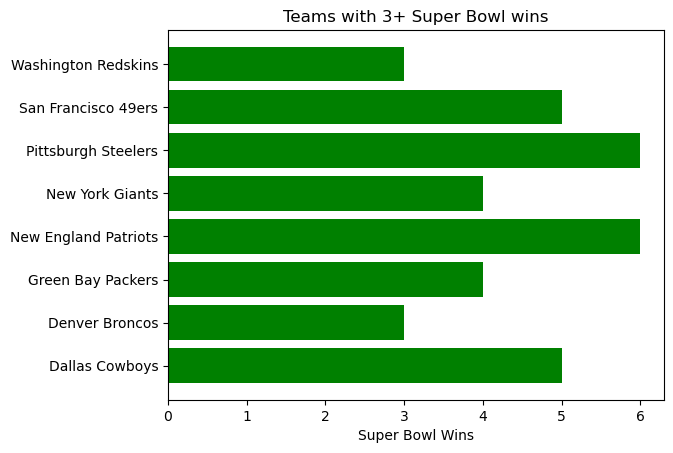

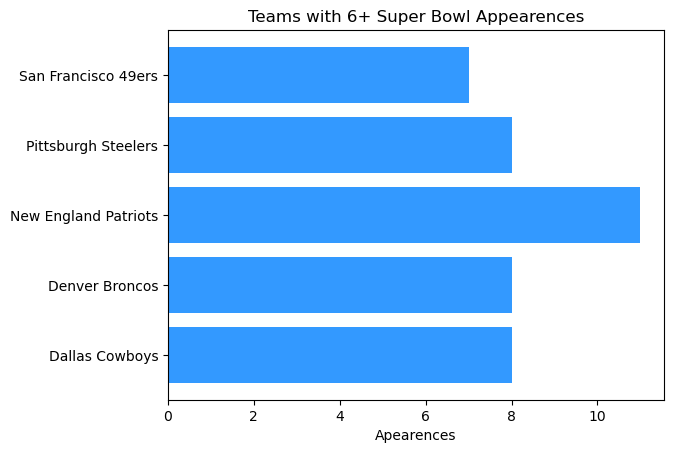

In [7]:
teams = np.array(nfl_teams)
won, lost, appeared = nflScape(teams)
threePlus = np.where(won >=3)[0]
sixPlus =  np.where(appeared > 5)[0]
topWinners = []
appearedTeams = []

wins = []
loses = []
appearence = []
# Teams with 3 plus wins
for i in threePlus: 
    topWinners.append(teams[i])
    wins.append(won[i])
    loses.append(lost[i])
# Teams with over 5 appearences
for i in sixPlus: 
    appearedTeams.append(teams[i])
    appearence.append(appeared[i])
wins = np.array(wins)
topWinners = np.array(topWinners)
plt.rcdefaults()
fig, ax = plt.subplots()


ax.barh(topWinners, wins,align='center', color='green')
ax.set_xlabel('Super Bowl Wins')
ax.set_title('Teams with 3+ Super Bowl wins')


fig1, ax1 = plt.subplots()
ax1.barh(appearedTeams, appearence,align='center', color='#3399FF')
ax1.set_xlabel('Apearences')
ax1.set_title('Teams with 6+ Super Bowl Appearences')
plt.show()



# 5 teams (out of 32 teams)  accounted for 77% of all Super Bowl apearences

* This dataset recorded up to Super Bowl LIV (54).

<h1><center>Moving On...</center></h1>
<p><center>I can keep this trend going on for so many other sectors (music industy, fast food companies, super markets, etc.), but instead I'd like to switch it up and look into some other interesting results thats can stem from Oligoplies.</center></p>

# 2. Effects of Oligoploies

<h1><center> Price Collusion/Price Fixing</center></h1>
<p><center>Agreement between two or more companies to change prices of their products to reduce competition and increase profits. Price collusion is illegal in most countries, but can be hard to prove. This act is mostly seen in Oligoplies and Monopolies. Here is a list of some cases of price fixing [Price Fixing Cases](https://en.wikipedia.org/wiki/Price_fixing_cases). The next charts <b>are not</b> accusing these companies of price fixing/collusion. My goal is to present the reader with interesting data points and let the reader deciding their own opinion.</center></p>

<h1><center>iPhone vs Samsung Prices</center></h1>
<p><center>This dataset contains the prices of iPhones and Samsung phones that were released in Ukraine. The prices in the dataset were inputted as hrynia, which at the time of the calculations was about 0.027 US Dollars. The dataset also <b>did not</b> mention if the prices were pre or post tax, but based off of the data it seems to be posted tax</center></p>

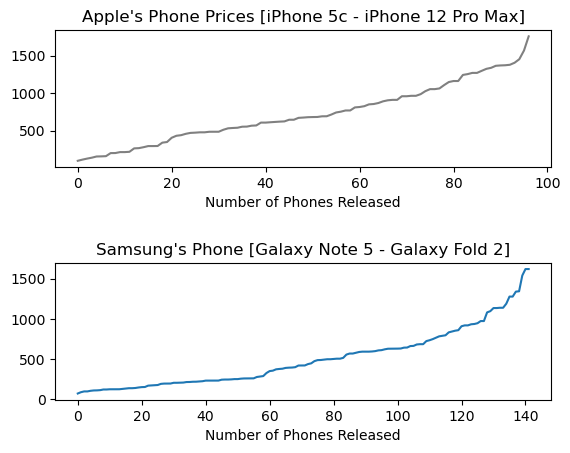

In [8]:
apple, samsung = phonePrices(["Apple","Samsung"])
apple.sort()
samsung.sort()
fig, ax = plt.subplots(2)
fig.subplots_adjust(hspace=0.7)
ax[0].plot(range(len(apple)),apple,color="grey")
ax[0].set_title("Apple's Phone Prices [iPhone 5c - iPhone 12 Pro Max]")
ax[0].set(xlabel="Number of Phones Released")
ax[1].plot(range(len(samsung)),samsung,)
ax[1].set_title("Samsung's Phone [Galaxy Note 5 - Galaxy Fold 2]")
ax[1].set(xlabel="Number of Phones Released");

<h3><center>As we can see from the data, there are very close resemblies of prices through the history of phone releases with Apple's max price being around \$1754 and Samsung's max price being around \$1619</center></h3>

<h1><center>The Concentration of Wealth</center></h1>
<p><center>Another potential problem with Oligolopies is that there is usually a concentration of wealth due to the fact how large these companies tend to get. From this dataset we will be able to examine that some of the companies listed earlier have produced some of the richest people on earth. This dataset has a list of the <b>100 richest people in the world</b> which was <b>last updated Augest 17th 2022</b>.</center></p>

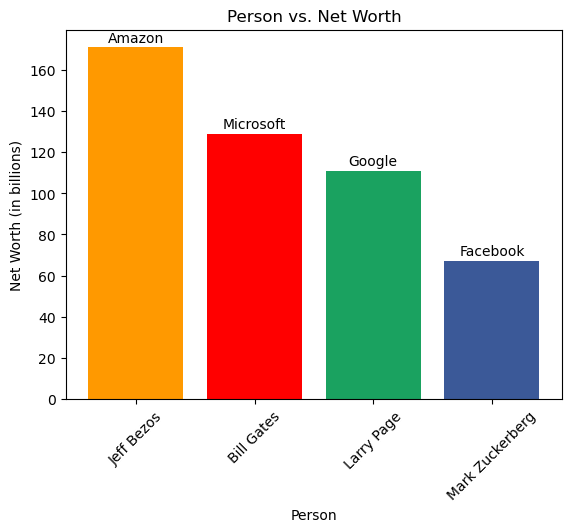

In [9]:
companies = ['Amazon','Microsoft','Google','Facebook']
names, netWorths = richPeople(companies)


fig, ax = plt.subplots()
ax.bar(names, netWorths, color=['#FF9900','red','#1aa260','#3b5998'])
ax.set_xlabel('Person')
ax.set_ylabel('Net Worth (in billions)')
ax.set_title('Person vs. Net Worth')

plt.xticks(rotation=45)


for i, v in enumerate(netWorths):
    ax.text(i, v + 2.5, companies[i], ha='center')


plt.show()

<h3><center>Many of these names are very well known and these people were within the top 15 of the dataset. Most of these companies (Google, Amazon, and Microsoft) have actually produced more than 1 of the top 100 richest people, but for this chart I just used 1 person from each company.</center></h3>

# 3. Recap

Throughout this notebook I respresented different aspects of Oligolopies and some effects that can be examined within different sectors:Beverages, Technology, Pharmaceutical, and Sports. First we saw the distribution of the total revenue of the top companies within each of these sectors and for the Sports sector we examined Super Bowl wins/appearences. After that we ventured into looking at some cons that could be a result of Oliogopies which were price fixing and concentration of wealth. Each of those cons can result in many negative events that can affect both small companies and individuals.

<h3><b>Comments:</b></h3> My goal of making this notebook was to learn more about Oligolopies and practice some python. I have no previous background in finance or economics so I don't want the readers to view this notebook as an informative tool to use in their personal life or take any of my claims as trust worthy. <b>BUT</b>, I do want the readers to examine the data presented in this notebook and think for themselves about this very interesting market structure. 


# Datasets:

- [Fortune 1000 Companies]("datasets/Fortune1000CompaniesRevenue.csv") 
- [Superbowl]("datasets/superbowl.csv") 
- [Phone Prices]("datasets/phones_data.csv")
- [Richest People]("datasets/TopRichestInWorld.csv")
- Datasets were found at [Kaggle](https://www.kaggle.com/)
   
